In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [136]:
df = pd.read_csv("melb_data.csv")
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [137]:
df.shape

(13580, 21)

In [138]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [139]:
x = df.drop('Price', axis=1)
y = df['Price']

In [140]:
x.shape

(13580, 20)

In [141]:
x = x.fillna(method='bfill')
x.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1367
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [142]:
import category_encoders as ce
encoder = ce.OrdinalEncoder()
x = encoder.fit_transform(x)

In [143]:
feature_name = x.columns

In [144]:
# SPLITTING DATASET IN TRAINING AND TEST

In [145]:
from sklearn.model_selection import train_test_split

# Split the dataset into 30% test and 70% training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [146]:
from sklearn.feature_selection import f_regression
f_value = f_classif(x, y)

for feature in zip(feature_name, f_value[0]):
    print(feature)

('Suburb', 1.273505910828929)
('Address', 1.059145474508582)
('Rooms', 3.986265916747031)
('Type', 1.8512085318233247)
('Method', 1.8567517441846704)
('SellerG', 1.116706476123566)
('Date', 1.016512516318111)
('Distance', 1.2510898492938427)
('Postcode', 1.2424503597436714)
('Bedroom2', 3.568457917590798)
('Bathroom', 2.937024410368178)
('Car', 1.4607495385937714)
('Landsize', 0.5680690804781328)
('BuildingArea', 0.6373624183602326)
('YearBuilt', 1.4987124895796644)
('CouncilArea', 1.0748521032043106)
('Lattitude', 1.3389928119387782)
('Longtitude', 1.4559368426257062)
('Regionname', 1.1971739045770509)
('Propertycount', 0.9722776031256319)


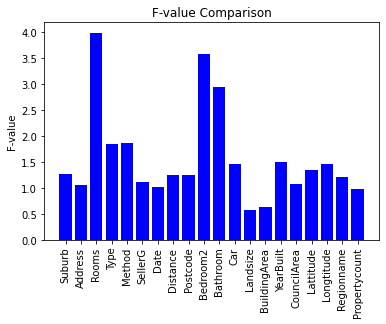

In [147]:
plt.bar(x=feature_name, height=f_value[0], color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

In [148]:
from sklearn.feature_selection import VarianceThreshold
select = VarianceThreshold()
select.fit_transform(x)


for feature in zip(feature_name, select.variances_):
    print(feature)

('Suburb', 313.0)
('Address', 13377.0)
('Rooms', 0.9133868571341811)
('Type', 0.4011211313093629)
('Method', 1.0695640084070612)
('SellerG', 267.0)
('Date', 57.0)
('Distance', 34.4393962326561)
('Postcode', 977.0)
('Bedroom2', 0.9329347932179568)
('Bathroom', 0.4784298739157689)
('Car', 0.9269341067280349)
('Landsize', 433014.0)
('BuildingArea', 44515.0)
('YearBuilt', 822.0)
('CouncilArea', 33.0)
('Lattitude', 0.0062816568783015505)
('Longtitude', 0.010797648730010415)
('Regionname', 1.4099021778974101)
('Propertycount', 21401.0)


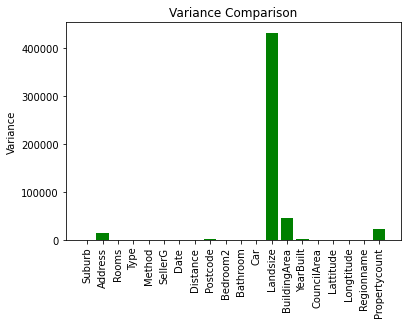

In [149]:
plt.bar(x=feature_name, height=select.variances_, color='green')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

In [150]:
from sklearn.feature_selection import mutual_info_regression
mc = mutual_info_classif(x, y, random_state=0)

# Print the name and mutual information score of each feature
for feature in zip(feature_name, mc):
    print(feature)

('Suburb', 0.08489825163744324)
('Address', 0.05616707835173251)
('Rooms', 0.45223675924307205)
('Type', 1.2011658035782622)
('Method', 1.3218545701710047)
('SellerG', 0.10600546666434152)
('Date', 0.01859245698066303)
('Distance', 0.08986990643428339)
('Postcode', 0.15215991948624286)
('Bedroom2', 0.42417151380761364)
('Bathroom', 0.8527660936444983)
('Car', 0.5612505025906298)
('Landsize', 0.1279970436348803)
('BuildingArea', 0.13225829662533162)
('YearBuilt', 0.08207066216789816)
('CouncilArea', 0.12170469364031256)
('Lattitude', 0.11239844846447866)
('Longtitude', 0.11349121354496106)
('Regionname', 0.3036036550402281)
('Propertycount', 0.07907304998512199)


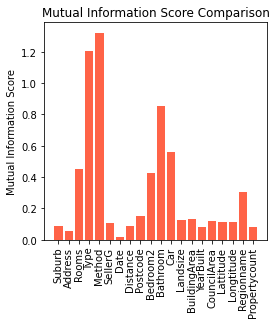

In [151]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_name, height=mc, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()

In [152]:
from sklearn.feature_selection import SelectKBest
skb = SelectKBest(score_func=f_regression, k=6)                  
x_new = skb.fit_transform(x, y)

print('Number of features before feature selection: {}'.format(x.shape[1]))
print('Number of features after feature selection: {}'.format(x_new.shape[1]))

Number of features before feature selection: 20
Number of features after feature selection: 6


In [153]:
# FEATURE SELECTION FROM SEQUENTIAL FORWARD SELECTION

In [154]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
sel = SequentialFeatureSelector(estimator=LinearRegression(),k_features=(1,20), forward=True)
sel.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 20))

In [155]:
print('Best accuracy score: %.2f' % sel.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sel.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sel.k_feature_names_)

Best accuracy score: 0.56
Best subset (indices): (0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 14, 16, 17, 18)
Best subset (corresponding names): ('Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode', 'Bathroom', 'Car', 'YearBuilt', 'Lattitude', 'Longtitude', 'Regionname')


In [156]:
# FEATURE SELECTION FROM SEQUENTIAL BACKWARD SELECTION

In [157]:
sel = SequentialFeatureSelector(estimator=LinearRegression(),k_features=(1,20), forward=False)
sel.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 20))

In [158]:
print('Best accuracy score: %.2f' % sel.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sel.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sel.k_feature_names_)

Best accuracy score: 0.56
Best subset (indices): (0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 14, 16, 17, 18)
Best subset (corresponding names): ('Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode', 'Bathroom', 'Car', 'YearBuilt', 'Lattitude', 'Longtitude', 'Regionname')


In [159]:
# FEATURE SELECTION FROM RANDOM FOREST USING SelectFromModel

In [160]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
selector = SelectFromModel(estimator=RandomForestRegressor())
selector.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestRegressor())

In [161]:
print('The most important features based on random forest classifier:')
for feature_list_index in selector.get_support(indices=True):
    print('- ' + feature_name[feature_list_index])

The most important features based on random forest classifier:
- Rooms
- Type
- Distance
- Postcode
- Bathroom
- Landsize


In [162]:
x_imp_train = selector.transform(x_train)
x_imp_test = selector.transform(x_test)

# Print the results
print('Number of features before transformation: {}'.format(x_train.shape[1]))
print('Number of features after transformation: {}'.format(x_imp_train.shape[1]))

Number of features before transformation: 20
Number of features after transformation: 6


In [163]:
from sklearn.metrics import r2_score

In [164]:
rfr_full = RandomForestRegressor()

rfr_full.fit(x_train, y_train)

# Make predictions
pred_full = rfr_full.predict(x_test)

# Generate accuracy score
print("r2 score: ",r2_score(y_test, pred_full))

r2 score:  0.7731890898081593


In [165]:
rfr_lim = RandomForestRegressor()

# Train the classifier with limited features
rfr_lim.fit(x_imp_train, y_train)

# Make predictions
pred_lim = rfr_lim.predict(x_imp_test)

print("r2 score: ",r2_score(y_test, pred_lim))

r2 score:  0.7286941469882678


In [166]:
# FEATURE SELECTION USING EXHAUSTIVE FEATURE SELECTION

In [167]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
efs = ExhaustiveFeatureSelector(estimator=LinearRegression(), min_features=1, max_features=3, print_progress=True, cv=2)
efs = efs.fit(x_train, y_train)
print(efs.best_feature_names_)

Features: 1350/1350

UnboundLocalError: local variable 'best_subset' referenced before assignment